<a href="https://colab.research.google.com/github/srikavya26/Credit-Default/blob/main/LendingClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introduction

 **Credit Default - Lending Club Dataset kaggle**

 ***Dataset - https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv***

**Install Required Libraries**

**Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


In [4]:
df=pd.read_csv("/content/loan.csv")

/tmp/ipython-input-446814595.py:1: DtypeWarning: Columns (19,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/loan.csv")


In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print("Raw shape:", df.shape)

Raw shape: (650685, 145)


In [9]:
df['loan_status'].unique()
bad_status = ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off']
good_status = ['Fully Paid']
df = df[df['loan_status'].isin(bad_status + good_status)].copy()
df['defaulted'] = df['loan_status'].apply(lambda x: 1 if x in bad_status else 0)
print("After filtering to final statuses:", df.shape)
df['defaulted'].value_counts(normalize=True)

print(df.describe(include='all').T)

missing = df.isna().sum().sort_values(ascending=False)
missing = pd.DataFrame({'missing_count': missing, 'missing_pct': missing / len(df)})
missing.head(40)

After filtering to final statuses: (150171, 146)
                                               count unique  \
id                                               0.0    NaN   
member_id                                        0.0    NaN   
loan_amnt                                   150171.0    NaN   
funded_amnt                                 150171.0    NaN   
funded_amnt_inv                             150171.0    NaN   
term                                          150171      2   
int_rate                                    150171.0    NaN   
installment                                 150171.0    NaN   
grade                                         150171      7   
sub_grade                                     150171     35   
emp_title                                     139163  51111   
emp_length                                    139693     11   
home_ownership                                150171      4   
annual_inc                                  150171.0    NaN   
verifi

,missing_count,missing_pct
id,150171,1.000000
member_id,150171,1.000000
url,150171,1.000000
desc,150164,0.999953
orig_projected_additional_accrued_interest,149267,0.993980
hardship_end_date,148845,0.991170
hardship_loan_status,148845,0.991170
hardship_start_date,148845,0.991170
hardship_dpd,148845,0.991170
hardship_type,148845,0.991170


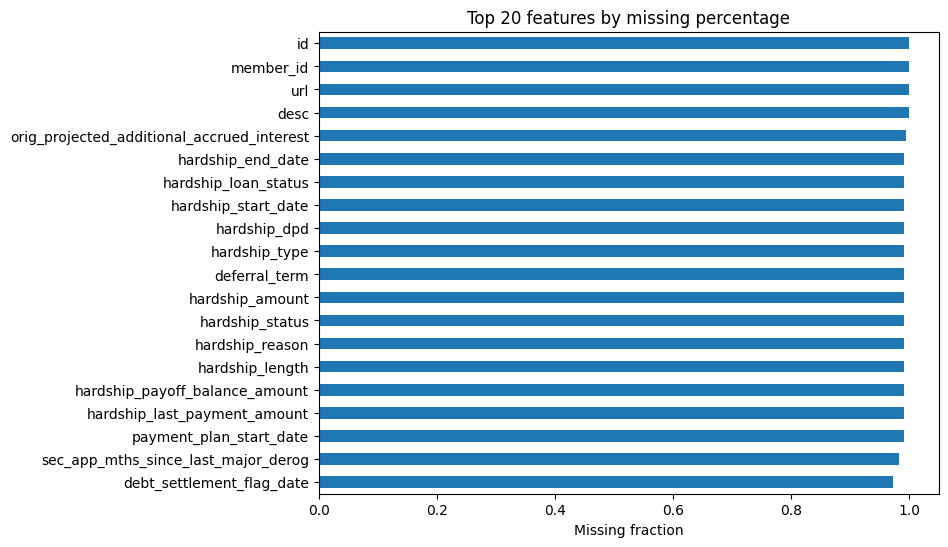

In [10]:
plt.figure(figsize=(8,6))
missing.head(20)['missing_pct'].plot(kind='barh')
plt.title("Top 20 features by missing percentage")
plt.xlabel("Missing fraction")
plt.gca().invert_yaxis()
plt.show()


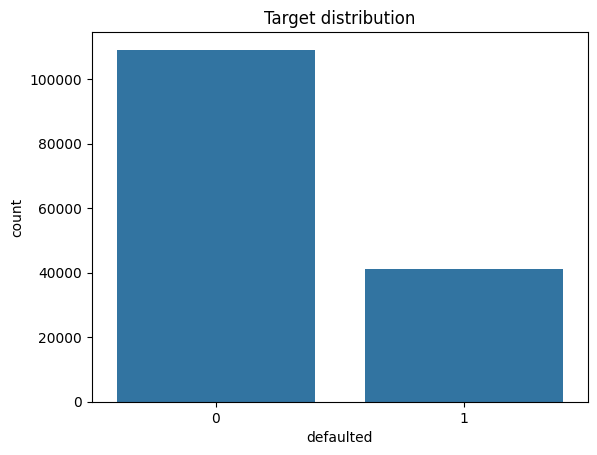

In [11]:
sns.countplot(x='defaulted', data=df)
plt.title("Target distribution")
plt.show()


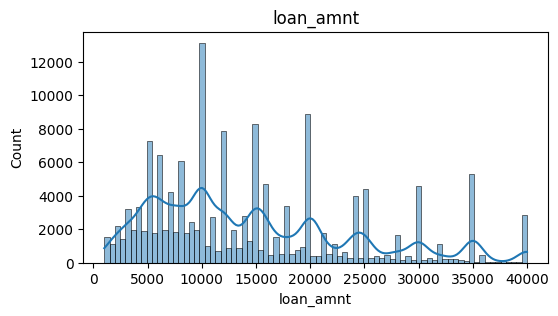

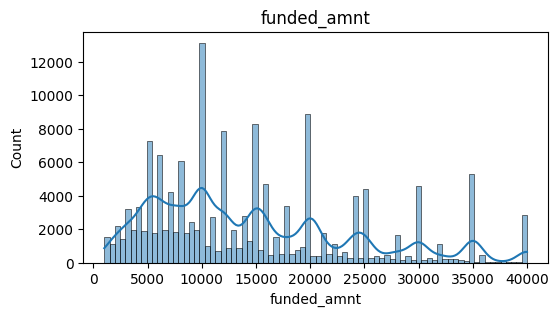

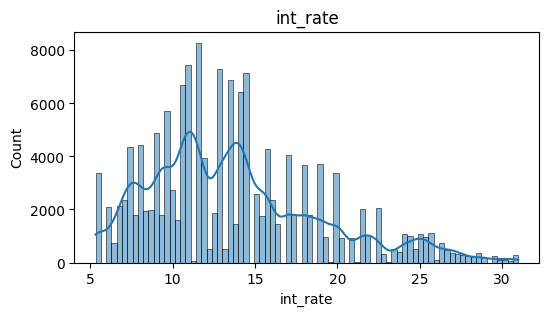

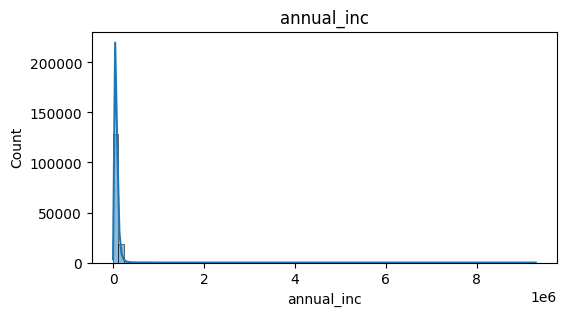

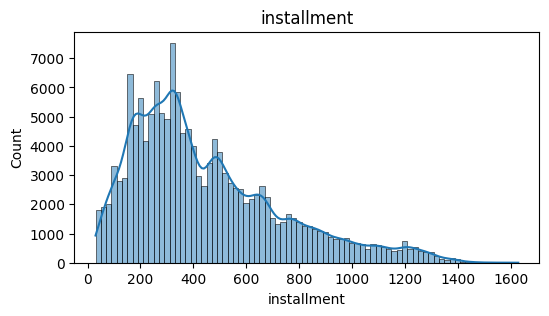

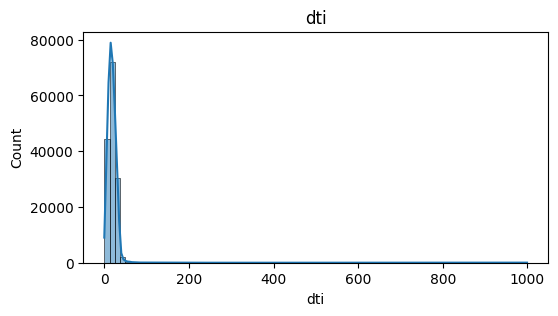

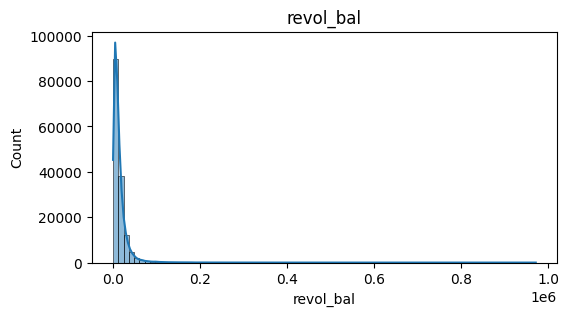

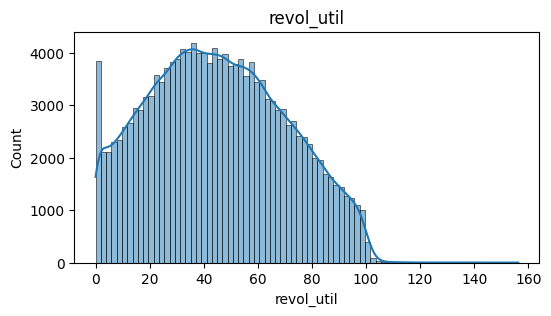

In [12]:
numeric = df.select_dtypes(include=[np.number]).columns.tolist()
num_plot = ['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'installment', 'dti', 'revol_bal', 'revol_util']
for col in [c for c in num_plot if c in df.columns]:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col].dropna(), bins=80, kde=True)
    plt.title(col)
    plt.show()

In [17]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for c in ['grade','sub_grade','home_ownership','verification_status','purpose','term','emp_length']:
    if c in df.columns:
        print("", c, "value_counts ====")
        print(df[c].value_counts().head(10))
        print()

 grade value_counts ====
grade
C    44856
B    43963
D    24568
A    23713
E     9093
F     3136
G      842
Name: count, dtype: int64

 sub_grade value_counts ====
sub_grade
B5    10814
C1    10001
B4     9702
C4     9014
C2     8872
C3     8627
C5     8342
B3     7943
B2     7888
B1     7616
Name: count, dtype: int64

 home_ownership value_counts ====
home_ownership
MORTGAGE    72780
RENT        58264
OWN         19100
ANY            27
Name: count, dtype: int64

 verification_status value_counts ====
verification_status
Source Verified    63526
Verified           44201
Not Verified       42444
Name: count, dtype: int64

 purpose value_counts ====
purpose
debt_consolidation    83796
credit_card           28110
other                 11990
home_improvement      11746
major_purchase         4210
medical                2279
car                    1927
small_business         1732
house                  1504
moving                 1425
Name: count, dtype: int64

 term value_counts ====
term

In [16]:
from sklearn.feature_selection import mutual_info_classif
candidates = ['loan_amnt','term','int_rate','grade','emp_length','home_ownership','annual_inc','dti','open_acc','revol_bal','revol_util','total_acc']
candidates = [c for c in candidates if c in df.columns]
X_temp = df[candidates].copy()
for col in X_temp.select_dtypes(include=['object']).columns:
    X_temp[col] = X_temp[col].astype('category').cat.codes
X_temp = X_temp.fillna(-999)
mi = mutual_info_classif(X_temp, df['defaulted'], discrete_features='auto', random_state=42)
mi_df = pd.Series(mi, index=X_temp.columns).sort_values(ascending=False)
print("Mutual information ranking:\n", mi_df)


Mutual information ranking:
 int_rate          0.039886
grade             0.038655
home_ownership    0.014414
term              0.010701
loan_amnt         0.007144
emp_length        0.006142
dti               0.005730
revol_util        0.004068
annual_inc        0.003103
total_acc         0.002534
open_acc          0.001462
revol_bal         0.000000
dtype: float64


**Read the Dataset**

**Exploratory Data Analysis**

**Model - 1**

*Model -1 Metrics*

**Model - 2**

*Model -2 Metrics*

**Model - 3**

 *Model -3 Metrics*

**Model - 4**



*Model - 4 Metrics*


**Model - 5**

*Model -5 Metrics*

#Evaluating Results

#Conclusion